In [0]:
from google.colab import files 
uploaded = files.upload() 

Saving feature_ML.txt to feature_ML (1).txt


In [0]:
import pandas as pd
mass = pd.read_table('feature_ML.txt', sep='\t', delim_whitespace=True, index_col=False, names=['filename','classe','area','circularity',' mu_NRL' ,'std_NRL','RLE' ,' std_I', 'kurtosis', 'skewness'])
mass
#mass['classe'] = mass.classe.apply(lambda x: 'malignant' if x==1 else 'benign')
#mass.columns
#mass['classe'].unique()
mass.groupby('classe').size()
#stack = mass.groupby(['classe'])['area'].count()
#stack

In [0]:
import seaborn as sns 
sns.pairplot(mass.loc[:,'classe':'skewness'], hue='classe')

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 12)                108       
_________________________________________________________________
dense_194 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 40.45%
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_196 (Dense)            (None, 12)                108       
_________________________________________________________________
dense_197 (Dense)            (None, 8)                 104       
____________________

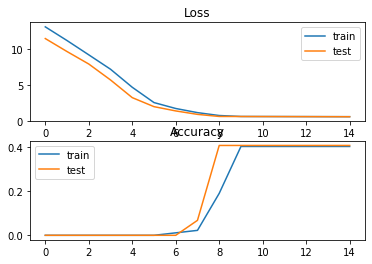

In [0]:
# 2-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
from matplotlib import pyplot
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt('feature_ML.txt', delimiter='\t', usecols=(1,2,3,4,5,6,7,8,9))
# split into input (X) and output (y) variables
X = dataset[:,1:]
Y = dataset[:,0]
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    history=model.fit(X[train], Y[train],validation_data=(X[test], Y[test]), epochs=15, batch_size=15, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

print(Y[test])

pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

#history.history

0.49038461538461536


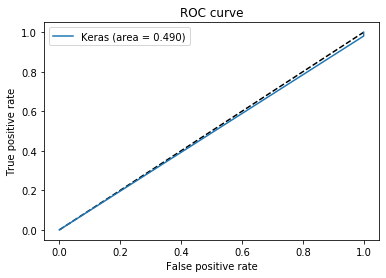

In [0]:
from sklearn.metrics import roc_curve, auc 
import pylab as plt 
y_pred_keras = model.predict(X[test]).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y[test], y_pred_keras, pos_label=2)
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()



